In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
digimon = pd.read_csv("../datasets/DigiDB_digimonlist.csv")

In [3]:
digimon.head()

,Number,Digimon,Stage,Type,Attribute,Memory,Equip Slots,Lv 50 HP,Lv50 SP,Lv50 Atk,Lv50 Def,Lv50 Int,Lv50 Spd
0,1,Kuramon,Baby,Free,Neutral,2,0,590,77,79,69,68,95
1,2,Pabumon,Baby,Free,Neutral,2,0,950,62,76,76,69,68
2,3,Punimon,Baby,Free,Neutral,2,0,870,50,97,87,50,75
3,4,Botamon,Baby,Free,Neutral,2,0,690,68,77,95,76,61
4,5,Poyomon,Baby,Free,Neutral,2,0,540,98,54,59,95,86


## Stage  vs Attribute

ik verwacht geen correlatie tussen deze categories

<AxesSubplot:>

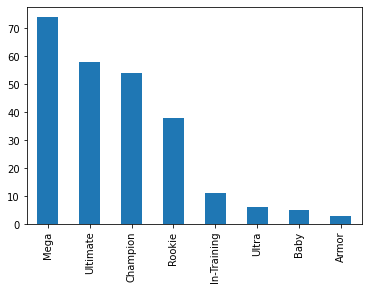

In [4]:
digimon.Stage.value_counts().plot(kind='bar')

<AxesSubplot:>

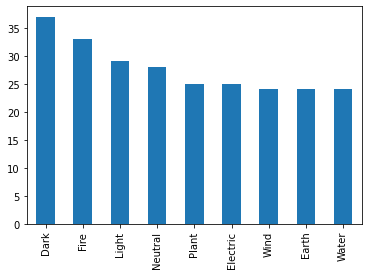

In [5]:
digimon.Attribute.value_counts().plot(kind='bar')

In [11]:
contingencyTable = digimon.groupby(['Stage','Attribute']).size().unstack('Stage', fill_value=0)
contingencyTable

Stage,Armor,Baby,Champion,In-Training,Mega,Rookie,Ultimate,Ultra
Attribute,,,,,,,,
Dark,0,0,5,2,13,4,10,3
Earth,1,0,8,1,5,4,5,0
Electric,0,0,6,0,10,2,7,0
Fire,1,0,10,1,7,6,8,0
Light,1,0,4,1,11,4,6,2
Neutral,0,5,3,2,7,4,6,1
Plant,0,0,7,2,6,5,5,0
Water,0,0,7,1,7,4,5,0
Wind,0,0,4,1,8,5,6,0


je ziet hier dat bij de stage armor de attributen, dark, electric, neutral, plant, water en wint allemaal 0 zijn. Dit betekent dat armor niet voorkomt bij deze attributen. Bij baby stage zijn alle attributen 0 behalve neutral. Dus alle attributen komen hier niet voor bij de baby stage behalve de neutral attribute. Bij de rest zie je wel verschillen eigenlijk, maar bij ultra zie je weer dat de meeste attributen 0 keer voorkomen behalve de dark attribuut, de light attrubute en de neutral attribute.

<AxesSubplot:xlabel='Attribute'>

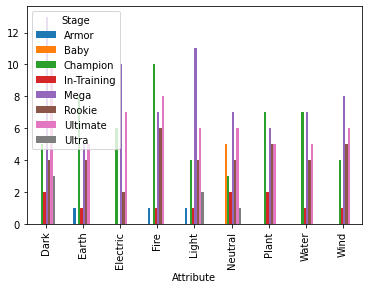

In [12]:
contingencyTable.plot(kind='bar')

Je ziet overal verschillen tussen alle categorieen. Je ziet dat sommige stages niet voorkomen bij de attributen, bijvoorbeeld bij Dark, zie je dat Armor, baby niet voorkomt. Dit klopt ook met de tabel. Bijvoorbeeld bij plant zie je dat armor, baby en ultra niet voorkomen enzovoort.

In [8]:
from scipy.stats import chi2_contingency
chi2_contingency(contingencyTable)

(74.09777624477839,
 0.05306703774738181,
 56,
 array([[ 0.44578313,  0.74297189,  8.02409639,  1.63453815, 10.99598394,
          5.64658635,  8.6184739 ,  0.89156627],
        [ 0.28915663,  0.48192771,  5.20481928,  1.06024096,  7.13253012,
          3.6626506 ,  5.59036145,  0.57831325],
        [ 0.30120482,  0.50200803,  5.42168675,  1.10441767,  7.42971888,
          3.81526104,  5.82329317,  0.60240964],
        [ 0.39759036,  0.6626506 ,  7.15662651,  1.45783133,  9.80722892,
          5.03614458,  7.68674699,  0.79518072],
        [ 0.34939759,  0.58232932,  6.28915663,  1.2811245 ,  8.6184739 ,
          4.42570281,  6.75502008,  0.69879518],
        [ 0.3373494 ,  0.562249  ,  6.07228916,  1.23694779,  8.32128514,
          4.27309237,  6.52208835,  0.6746988 ],
        [ 0.30120482,  0.50200803,  5.42168675,  1.10441767,  7.42971888,
          3.81526104,  5.82329317,  0.60240964],
        [ 0.28915663,  0.48192771,  5.20481928,  1.06024096,  7.13253012,
          3.662650

0.05% kans dat er geen verschil is